## Deep Neural Networks with CNNs

#### Start with Loading in the Fashion MNIST dataset 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras import utils

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
y_binary_train = utils.to_categorical(y_train)
y_binary_test = utils.to_categorical(y_test)

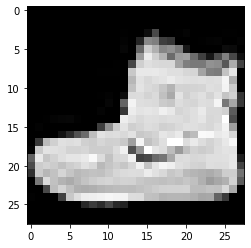

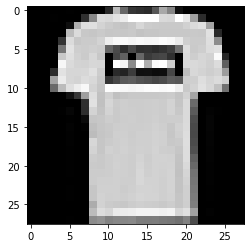

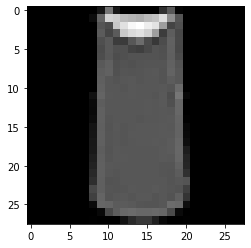

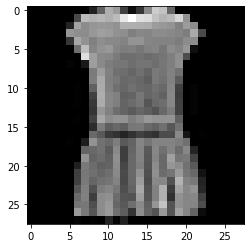

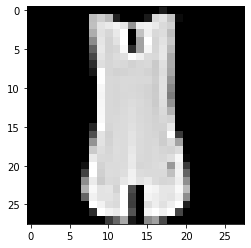

In [5]:
for i in range(5):
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

[Fashion Mnist](https://www.tensorflow.org/tutorials/keras/classification)

Build MLP 

In [6]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=(28, 28)))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

In [7]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
%%time
training_results = model_1.fit(X_train, y_binary_train,
                               epochs=100, batch_size=128,
                               validation_data=(X_test, y_binary_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 37us/step - loss: 2.6951 - accuracy: 0.7631 - val_loss: 0.7192 - val_accuracy: 0.7944
Epoch 2/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.5395 - accuracy: 0.8274 - val_loss: 0.5554 - val_accuracy: 0.8194
Epoch 3/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.4462 - accuracy: 0.8459 - val_loss: 0.4964 - val_accuracy: 0.8369
Epoch 4/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.4030 - accuracy: 0.8574 - val_loss: 0.4631 - val_accuracy: 0.8464
Epoch 5/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.3662 - accuracy: 0.8674 - val_loss: 0.4835 - val_accuracy: 0.8403
Epoch 6/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.3530 - accuracy: 0.8713 - val_loss: 0.4814 - val_accuracy: 0.8383
Epoch 7/100
60000/60000 [==============================] - 2s 

Epoch 56/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1566 - accuracy: 0.9414 - val_loss: 0.4715 - val_accuracy: 0.8907
Epoch 57/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1562 - accuracy: 0.9426 - val_loss: 0.4636 - val_accuracy: 0.8849
Epoch 58/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1493 - accuracy: 0.9445 - val_loss: 0.5046 - val_accuracy: 0.8866
Epoch 59/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.1493 - accuracy: 0.9440 - val_loss: 0.5163 - val_accuracy: 0.8872
Epoch 60/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1543 - accuracy: 0.9426 - val_loss: 0.5546 - val_accuracy: 0.8902
Epoch 61/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1539 - accuracy: 0.9429 - val_loss: 0.5680 - val_accuracy: 0.8777
Epoch 62/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1455 - accuracy: 0.9447

In [10]:
def visualize_loss(model_results):
    history = model_results.history
    training_loss_values = history['loss']
    val_loss_values = history['val_loss']

    epochs = range(1, len(training_loss_values) + 1)
    plt.plot(epochs, training_loss_values, 'g', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'r', label='Val Loss')

    plt.title('Training vs Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def visualize_accuracy(model_results):
    history = model_results.history
    training_acc_values = history['accuracy']
    val_acc_values = history['val_accuracy']

    epochs = range(1, len(training_acc_values) + 1)
    plt.plot(epochs, training_acc_values, 'g', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Val Accuracy')

    plt.title('Training vs Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [11]:
plt.style.use('fivethirtyeight')

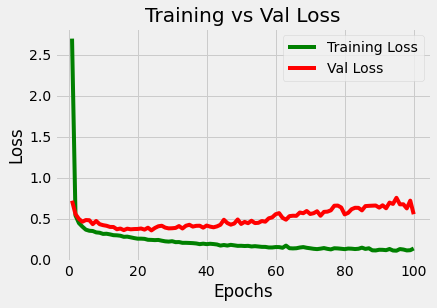

In [12]:
visualize_loss(training_results)

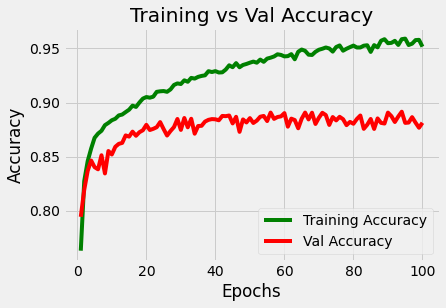

In [13]:
visualize_accuracy(training_results)

Now I'm going to compare the performance using a convolutional neural network.  I'm going to be explaining it afterwards

#### Compare Results to a CNN 

In [14]:
from keras.layers import Conv2D, MaxPooling2D

In [15]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(64, activation = 'relu'))
model_cnn.add(Dense(10, activation = 'softmax'))

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

The last model had 300,000 trainable parameters - so less than half 

In [16]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
%%time
training_results_cnn = model_cnn.fit(X_train.reshape(60000, 28, 28, -1), y_binary_train,
                               epochs=10, batch_size=128,
                               validation_data=(X_test.reshape(10000, 28, 28, -1), y_binary_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.7798 - accuracy: 0.7746 - val_loss: 0.4294 - val_accuracy: 0.8486
Epoch 2/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.3693 - accuracy: 0.8682 - val_loss: 0.3550 - val_accuracy: 0.8696
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3178 - accuracy: 0.8832 - val_loss: 0.3351 - val_accuracy: 0.8789
Epoch 4/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.2896 - accuracy: 0.8945 - val_loss: 0.3272 - val_accuracy: 0.8835
Epoch 5/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.2696 - accuracy: 0.9018 - val_loss: 0.3153 - val_accuracy: 0.8860
Epoch 6/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2475 - accuracy: 0.9079 - val_loss: 0.3192 - val_accuracy: 0.8859
Epoch 7/10
60000/60000 [==============================] 

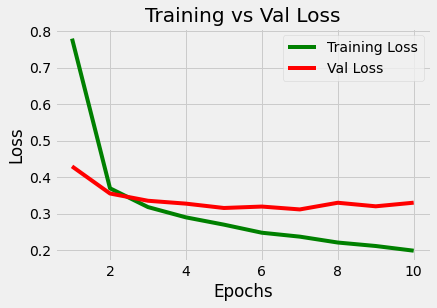

In [18]:
visualize_loss(training_results_cnn)

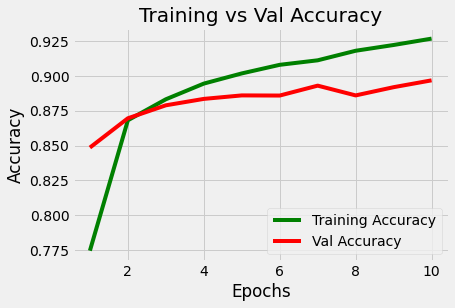

In [19]:
visualize_accuracy(training_results_cnn)

In [20]:
training_results_cnn.history['val_accuracy'][-1]

0.8967999815940857

In [21]:
training_results.history['val_accuracy'][-1]

0.8812999725341797

## [Jump to Presentation]( https://docs.google.com/presentation/d/1Zd7SVrKFs4bAbdJlk2lKdHkufgvEe_Y297W4NDqiuUg/edit?usp=sharing)

## Slide 2 
- CNN give amazing results on image datasets 
- We saw we got a boost in performance using a CNN on the fashion MNIST dataset 
- You should be comfortable with the part on the right that is the Multi-Layer Perceptron.  We are adding this part on the left
- The stuff on the left (what I added think of that as feature engineering); the stuff on the right think of that as after getting all the features we are going to classify based on the features 

## Slide 3
- Before CNNs - you would have to hand code in all the features.  If you were trying to identify a cat in an image - you'd have to write code to look for the triangle of the cat ears and the tail.  CNNs automate this process, you are saying here are a bunch of images of cats you find the most important features using back propegation
- The big difference between a multilayer perceptron and a cnn - since we are using filters with a cnn we are learning local patterns.  So if we find cat ears on the top left of an image, it will recognize that in the bottom right of another image.  While a multi layer perceptron learns global patterns.  Which works well with toy datasets where each image is centered in the middle of the image, but that is not a real world scenario 

## Slide 4
- This is an example of a filter 
- It multiplies everything by the pixel value and then adds everything together - (1x1)+(1x0)+(1x1)+(0x0)+(1x1)+(1x0) + (0x1) + (0x0) + (1x1)
- For the second point it would be 
- (1 x 1) + (1 x 0) + (1 x 0)
- (0 x 1) + (1 x 1) + (0 x 1)
- (1 x 0 ) + (0 x 1) + (1 x 1)
- 3

## Slide 5 
Here's it all in action! 

## Slide 6 
- This is making 32 filters of 3x3 filters - Conv2D is used for 2 dimensional images; 3d is for 3d images like MRIs 
- we're using a padding - which we'll talk about in a second 
- then we're using a pooling layer of size 2x2 we'll talk about pooling in a minute 
- remember that back propegation will optimize the filters 

## Slide 7
- When the filters go over an image, it goes over the edges and corners less frequently than the center.  You can add padding (typically 0s), so that centers the image 

## Slide 8
- Stride refers to the number of pixels you move at each step.  Larger the stride the smaller the output feature map will be.  The pro is you have a smaller output (leads to faster training), the con is you could be losing information 

## Slide 9
- You saw earlier the max pooling.  
- There are 2 common types of pooling 
- Max pooling takes the maximum value and avg takes the average value 
-  Reason we do this it is to reduce the dimensionality - we went from a 4x4 matrix to a 2x2 while hopefully not losing any information 

Here's the number of features with and without pooling 

In [22]:
model_cnn_no_pooling = Sequential()
model_cnn_no_pooling.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
#model_cnn.add(MaxPooling2D((2, 2)))
model_cnn_no_pooling.add(Conv2D(64, (3, 3), activation = 'relu'))
#model_cnn.add(MaxPooling2D((2, 2)))
model_cnn_no_pooling.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn_no_pooling.add(Flatten())
model_cnn_no_pooling.add(Dense(128, activation = 'relu'))
model_cnn_no_pooling.add(Dense(64, activation = 'relu'))
model_cnn_no_pooling.add(Dense(10, activation = 'softmax'))
model_cnn_no_pooling.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [23]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

4 million trainable params vs 138,000 trainable parameters 

In [24]:
model_cnn_no_pooling.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
training_results_cnn = model_cnn.fit(X_train.reshape(60000, 28, 28, -1), y_binary_train,
                               epochs=1, batch_size=128,
                               validation_data=(X_test.reshape(10000, 28, 28, -1), y_binary_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 19s 317us/step - loss: 0.1966 - accuracy: 0.9262 - val_loss: 0.3346 - val_accuracy: 0.8863


## Slide 10
- We see which pixels fire on the different filters 
- Convolutional layer 
- Downsampling layer
- CNN layer 
- Downlasmpling layer
- MLP 

## Slide 11 
- The way the convolutions work the learn higher level of abstrations - relate back to last slide 
- So we start with finding edges 
- Then it starts combining the edges to make a nose or an eye 
- Then it combines a nose and an eye to make a face 

In [25]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np

In [91]:
# download from https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog/download

# get all the data in the directory data/test, and reshape them
data_te = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'data/test',
    target_size=(224, 224),
    batch_size=1000,
    seed=123)

Found 500 images belonging to 2 classes.


In [92]:
# get all the data in the directory data/train, and reshape them
data_tr = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'data/train',
    target_size=(224, 224),
    batch_size=1000,
    seed=123)

Found 498 images belonging to 2 classes.


Combine both datasets since 500 images in "test" and 498 in the train 

In [93]:
data_tr.class_indices

{'hot_dog': 0, 'not_hot_dog': 1}

In [94]:
#split images and labels
images_tr, labels_tr = next(data_tr)

In [95]:
# shape of training images 
images_tr.shape

(498, 224, 224, 3)

In [96]:
# look at labels 
labels_tr.shape

(498, 2)

In [97]:
labels_tr[0]

array([1., 0.], dtype=float32)

In [98]:
#split images and labels
images_te, labels_te = next(data_te)

In [99]:
# combine train and test images 
images = np.concatenate((images_tr, images_te))

In [100]:
images.shape

(998, 224, 224, 3)

In [101]:
labels = np.concatenate((labels_tr[:,0], labels_te[:,0]))
labels.shape

(998,)

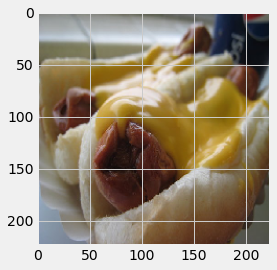

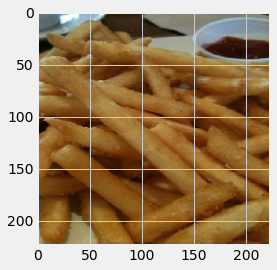

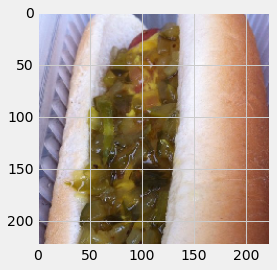

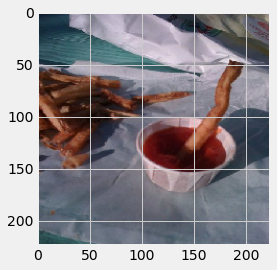

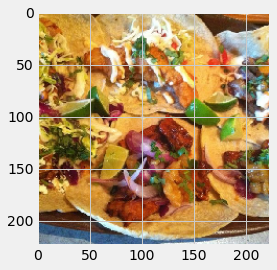

In [102]:
for i in range(5):
    plt.imshow(images[i])
    plt.show()

In [103]:
# break into train and test datasets
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [104]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3),
                      activation='relu',
                      input_shape=(224, 224,  3),
                      padding='SAME'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='SAME'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 32)      18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                3211296   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [105]:
cnn1 = cnn.fit(X_model,
               y_model,
               epochs=5,
               batch_size=50,
               validation_data=(X_test, y_test))

Train on 798 samples, validate on 200 samples
Epoch 1/5
798/798 [==============================] - 33s 42ms/step - loss: 0.9282 - accuracy: 0.5163 - val_loss: 0.6909 - val_accuracy: 0.5050
Epoch 2/5
798/798 [==============================] - 30s 37ms/step - loss: 0.6809 - accuracy: 0.5564 - val_loss: 0.6872 - val_accuracy: 0.5300
Epoch 3/5
798/798 [==============================] - 29s 37ms/step - loss: 0.6650 - accuracy: 0.6115 - val_loss: 0.6677 - val_accuracy: 0.6100
Epoch 4/5
798/798 [==============================] - 30s 37ms/step - loss: 0.6237 - accuracy: 0.6579 - val_loss: 0.6742 - val_accuracy: 0.5900
Epoch 5/5
798/798 [==============================] - 29s 36ms/step - loss: 0.5282 - accuracy: 0.7419 - val_loss: 0.8224 - val_accuracy: 0.5400


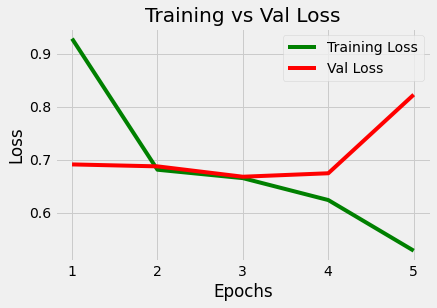

In [106]:
visualize_loss(cnn1)

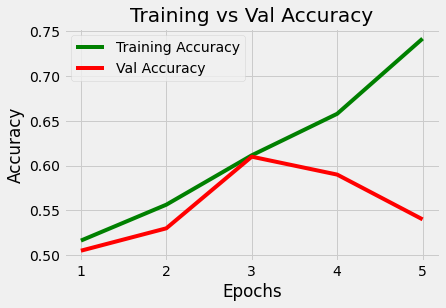

In [107]:
visualize_accuracy(cnn1)

In [108]:
prediction = cnn.predict_classes(X_test)

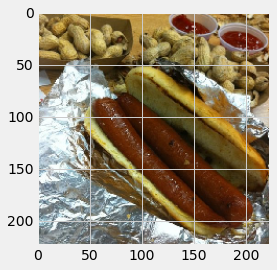

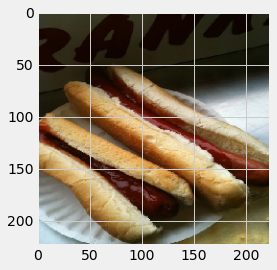

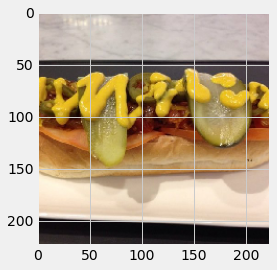

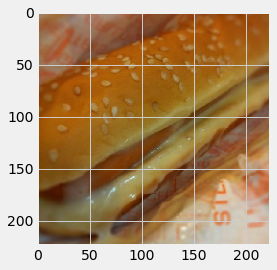

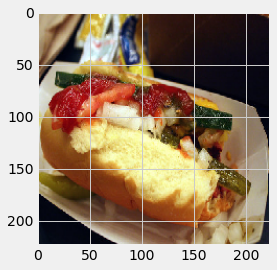

In [111]:
first_5 = 0 
for counter, pred in enumerate(prediction):
    if pred == y_test[counter]:
        plt.imshow(X_test[counter])
        plt.show()
        first_5 += 1
        if first_5 == 5:
            break

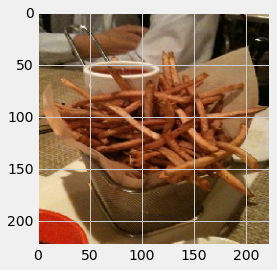

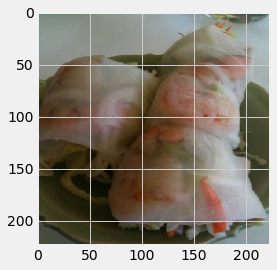

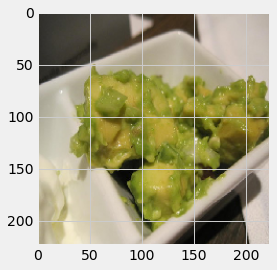

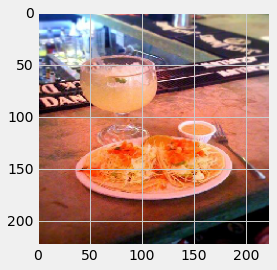

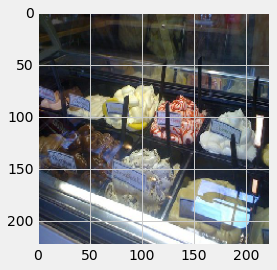

In [112]:
first_5 = 0 
for counter, pred in enumerate(prediction):
    if pred != y_test[counter]:
        plt.imshow(X_test[counter])
        plt.show()
        first_5 += 1
        if first_5 == 5:
            break